Sklearn datasets. Classification creation

In [18]:
from sklearn.datasets import make_classification as skdata
import pandas as pd

X, y = skdata(n_samples=100, n_features=10, n_classes=2, random_state=42)
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
data['Target'] = y

data.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,-1.140526,1.359706,0.861991,0.846092,0.606010,-1.556629,1.754794,1.696456,-1.280429,-2.081929,1
1,-0.078734,-1.329332,0.627375,-1.193006,-0.773010,0.097676,0.497998,0.959271,0.024510,1.451144,1
2,0.807427,0.730198,-1.285680,0.889484,-1.804882,-0.763259,0.048085,-0.904317,-1.627542,0.259723,0
3,0.588465,-0.375121,-0.575002,-0.149518,-0.563725,0.412931,0.243687,-0.506943,-0.822220,0.244967,0
4,1.636312,-1.640607,-1.360456,-0.941163,-1.430141,1.632411,0.130741,-1.435862,-0.440044,1.441273,0


Kaggle dataset import

In [16]:
dataFile = pd.read_csv('cat_dog.csv')

dataFile.isnull().sum() # Gaps checkout
dataFile.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


Manual dataset creating with NumPy

In [19]:
import numpy as np

dataManual = {
    'X': np.arange(0, 100, 1),
    'y': np.random.random(100)
}

df = pd.DataFrame(dataManual)

X_numpy = df[['X']]
y_numpy = df['y']


Linear regression. Model learning

Точність: 1.0
Матриця плутанини:
 [[17  0]
 [ 0 23]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



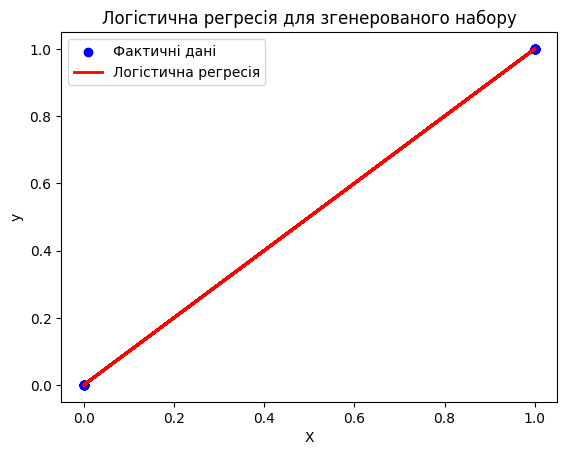

Точність: 1.0
Матриця плутанини:
 [[5019    0]
 [   0 4981]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5019
           1       1.00      1.00      1.00      4981

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



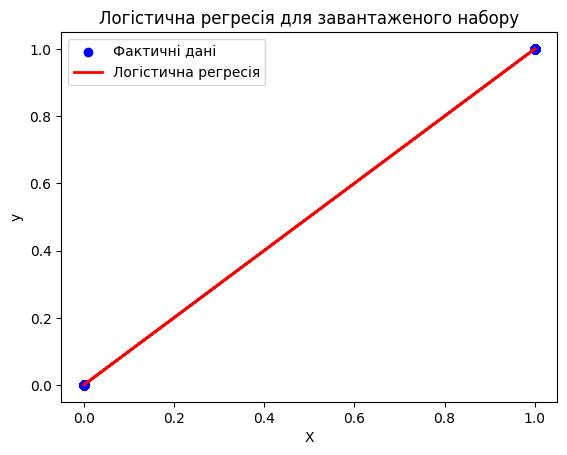

Середньоквадратична похибка (MSE): 0.08730997071676662
Середня абсолютна похибка (MAE): 0.2642066083239212
Коефіцієнт детермінації (R^2): 0.002797871902850746


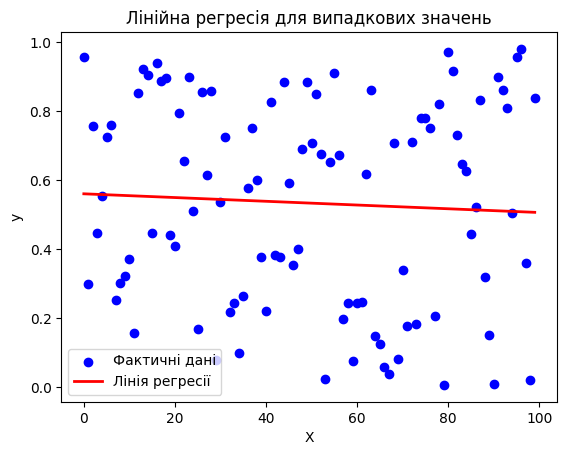

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

######## Логістична регресія для першого набору(штучні значення)
X = data.drop(columns=[f'Feature_{i}' for i in range(1, 11)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Точність:", accuracy_score(y_test, y_pred))
print("Матриця плутанини:\n", confusion_matrix(y_test, y_pred))
print("Звіт класифікації:\n", classification_report(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Фактичні дані')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Логістична регресія')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Логістична регресія для згенерованого набору')
plt.legend()
plt.show()

######## Логістична регресія для другого набору(Kaggle значення)

X_kaggle = dataFile.drop('image', axis=1)
y_kaggle = dataFile['labels']
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_kaggle, y_kaggle, test_size=0.4, random_state=42)

model_kaggle = LogisticRegression()
model_kaggle.fit(X_train_k, y_train_k)
y_pred_k = model_kaggle.predict(X_test_k)

print("Точність:", accuracy_score(y_test_k, y_pred_k))
print("Матриця плутанини:\n", confusion_matrix(y_test_k, y_pred_k))
print("Звіт класифікації:\n", classification_report(y_test_k, y_pred_k))

plt.scatter(X_test_k, y_test_k, color='blue', label='Фактичні дані')
plt.plot(X_test_k, y_pred_k, color='red', linewidth=2, label='Логістична регресія')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Логістична регресія для завантаженого набору')
plt.legend()
plt.show()

######## Лінійна регресія для третього набору(випадкові, ручні значення)

model = LinearRegression()

model.fit(X_numpy, y_numpy)
y_pred = model.predict(X_numpy)
mse = mean_squared_error(y_numpy, y_pred)
mae = mean_absolute_error(y_numpy, y_pred)
r2 = r2_score(y_numpy, y_pred)

print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Середня абсолютна похибка (MAE): {mae}")
print(f"Коефіцієнт детермінації (R^2): {r2}")

plt.scatter(X_numpy, y_numpy, color='blue', label='Фактичні дані')
plt.plot(X_numpy, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія для випадкових значень')
plt.legend()
plt.show()